In [1]:
### Data Collection
import pandas as pd

In [2]:
df = pd.read_csv('AAPL.csv')

In [3]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [4]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [5]:
df1 = df.reset_index()['close']
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

[&lt;matplotlib.lines.Line2D at 0x7f5293147460&gt;]

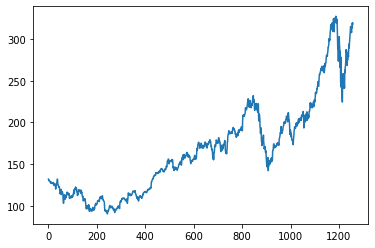

In [6]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [7]:
import numpy as np

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [9]:
##splitting dataset into train and test split
training_size = int(len(df) * 0.8)
test_size = len(df) - training_size
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1), :1]

In [10]:
training_size,test_size

(1006, 252)

In [11]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]   ##i=0, 0,1,2,3-----99   100
    dataX.append(a)
    dataY.append(dataset[i+time_step])
  return np.array(dataX), np.array(dataY)

In [12]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [13]:
print(X_train.shape)
print(y_train.shape)

(905, 100)
(905, 1)


In [14]:
X_train

array([[0.17607447, 0.17495567, 0.16862282, ..., 0.09055982, 0.08388922,
        0.09085536],
       [0.17495567, 0.16862282, 0.1696994 , ..., 0.08388922, 0.09085536,
        0.0873934 ],
       [0.16862282, 0.1696994 , 0.16727181, ..., 0.09085536, 0.0873934 ,
        0.09030651],
       ...,
       [0.23849531, 0.28214979, 0.27784345, ..., 0.42463903, 0.42109263,
        0.41653297],
       [0.28214979, 0.27784345, 0.2781812 , ..., 0.42109263, 0.41653297,
        0.39158152],
       [0.27784345, 0.2781812 , 0.28455628, ..., 0.41653297, 0.39158152,
        0.40640041]])

In [15]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [16]:
X_train

array([[[0.17607447],
        [0.17495567],
        [0.16862282],
        ...,
        [0.09055982],
        [0.08388922],
        [0.09085536]],

       [[0.17495567],
        [0.16862282],
        [0.1696994 ],
        ...,
        [0.08388922],
        [0.09085536],
        [0.0873934 ]],

       [[0.16862282],
        [0.1696994 ],
        [0.16727181],
        ...,
        [0.09085536],
        [0.0873934 ],
        [0.09030651]],

       ...,

       [[0.23849531],
        [0.28214979],
        [0.27784345],
        ...,
        [0.42463903],
        [0.42109263],
        [0.41653297]],

       [[0.28214979],
        [0.27784345],
        [0.2781812 ],
        ...,
        [0.42109263],
        [0.41653297],
        [0.39158152]],

       [[0.27784345],
        [0.2781812 ],
        [0.28455628],
        ...,
        [0.41653297],
        [0.39158152],
        [0.40640041]]])

In [17]:
pip install ipykernel

Note: you may need to restart the kernel to use updated packages.


In [18]:
### Create the Stacked LSTM model
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM( 50, return_sequences=True, input_shape = (100,1) ))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer = 'adam')

In [ ]:
model.summary()

In [ ]:
model.fit(X_train,y_train, epochs=35,batch_size=64,verbose=1)

In [ ]:
import tensorflow as tf

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics (training)

import sklearn.metrics as metrics

mae = metrics.mean_absolute_error(y_train,train_predict)
mse = metrics.mean_squared_error(y_train,train_predict)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_train,train_predict)

print("Results:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)

In [ ]:
### Calculate RMSE performance metrics (testing)

mae = metrics.mean_absolute_error(ytest,test_predict)
mse = metrics.mean_squared_error(ytest,test_predict)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(ytest,test_predict)

print("Results:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
trainPredictPlot

In [ ]:
# Create traces
import plotly.express as px
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(df1.size), y=scaler.inverse_transform(df1).flatten(),
                    mode='lines',
                    name='data'))
fig.add_trace(go.Scatter(x=np.arange(100, training_size-1), y=train_predict.flatten(),
                    mode='lines',
                    name='train'))
fig.add_trace(go.Scatter(x=np.arange(training_size+100, df1.size), y=test_predict.flatten(),
                    mode='lines', name='test'))

fig.show()

In [ ]:
model.predict(X_train)
X_train.shape